# Model Training

## Import

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv("StudentsPerformance.csv")

In [27]:
df.head(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93


## Preprocessing

In [28]:
X = df.drop(columns=['math score'], axis=1)
y = df['math score']

In [29]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
OH_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", OH_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]

)

In [30]:
X = preprocessor.fit_transform(X)

## Train/Test

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
X_train.shape, X_test.shape

((800, 19), (200, 19))

## Evaluation Function

In [32]:
def evaluate(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

## Models

In [33]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2628
- Mean Absolute Error: 4.1877
- R2 Score: 0.8808
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5991
- Mean Absolute Error: 4.4962
- R2 Score: 0.8561


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5244
- Mean Absolute Error: 5.1385
- R2 Score: 0.8169
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.4524
- Mean Absolute Error: 5.1328
- R2 Score: 0.8089


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2566
- Mean Absolute Error: 4.1873
- R2 Score: 0.8811
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.6070
- Mean Absolute Error: 4.4947
- R2 Score: 0.8557


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7785
- Mean Absolute Error: 4.6158
- R2 Score: 0.8563
-----------------------

## Results

In [34]:
pd.DataFrame(zip(model_list, r2_list), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

,Model Name,R2_Score
0,Linear Regression,0.856128
2,Ridge,0.855721
7,CatBoosting Regressor,0.832755
5,Random Forest Regressor,0.827483
8,AdaBoost Regressor,0.817730
1,Lasso,0.808932
6,XGBRegressor,0.793972
3,K-Neighbors Regressor,0.754153
4,Decision Tree,0.635386


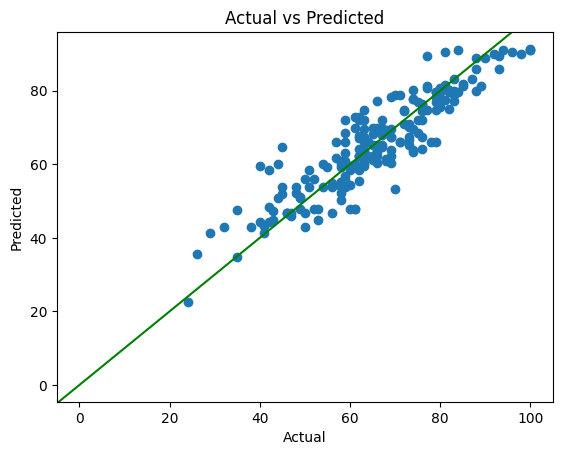

In [35]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.axline((0, 0),slope=1, color='green')
plt.show()

Ideally, if the predictions are perfect, the points will lie along a straight line with a slope of 1.

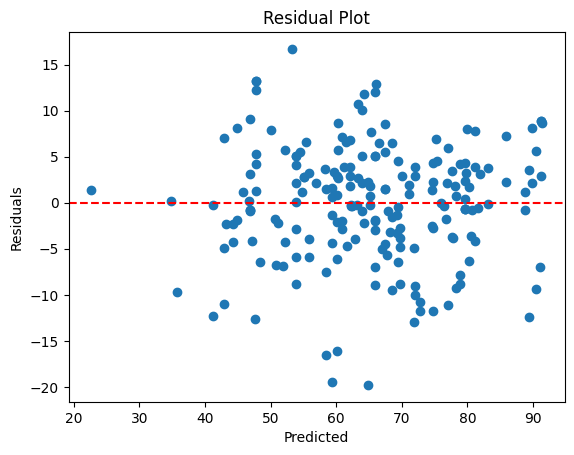

In [36]:
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

 This plot shows the residuals (differences between the predicted and actual) against the predicted values. A well-performing model will have residuals scattered randomly around zero (the red dashed line).